<a href="https://colab.research.google.com/github/mchhab/Business-Projects-from-UT-Austin---PGP/blob/main/Elite_Products_List_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("products_list_extract_from_Softrax.xlsx")

In [ ]:
df.shape

(4269, 79)

#The dataset contains 4269 rows and 79 columns.


In [ ]:
df.head()

,sku_cd,sku_desc,sku_class,sku_abc_cd,sku_weight,sku_size,sku_commiss_type,sku_taxable,sku_first_dt,sku_last_dt,...,sku_newsls_dr_tmplt,sku_firstyr_maint_dr_tmplt,sku_renwl_prcs_dr_tmplt,sku_process_cd,sku_createid,sku_createdttm,sku_modid,sku_moddttm,sku_exp_amt,sku_external_ref
0,EDR32B-AS-00,ELITE EVENT DRIVEN REPORTING (32BIT) ADDENDUM,135.0,NaN,0.0,0.0,NaN,N,2002-11-18 00:00:00.000,2017-07-18 13:55:29.227,...,1 MONTH,NaN,,STD,Iadmin,2002-11-18 14:17:56.673,admin,2017-07-18 13:55:29.227,0.0,NaN
1,EDR32B-CS-00,ELITE EVENT DRIVEN REPORTING (32BIT) CONTRACT,135.0,NaN,0.0,0.0,NaN,N,2002-11-18 00:00:00.000,2017-07-18 13:55:29.227,...,1 MONTH,NaN,,STD,Iadmin,2002-11-18 14:16:58.483,admin,2017-07-18 13:55:29.227,0.0,NaN
2,EDR32B-MT-00,ELITE EVENT DRIVEN REPORTING (32BIT) MAINTENANCE,135.0,NaN,0.0,0.0,NaN,N,2002-11-18 00:00:00.000,2003-04-02 00:00:00.000,...,STD,STD,,STD,Iadmin,2002-11-18 14:20:06.837,mstrings,2012-08-23 15:10:33.883,0.0,NaN
3,BSDW-CS-00,DATA WAREHOUSE CONTRACT,135.0,NaN,0.0,0.0,NaN,N,2006-06-07 00:00:00.000,NaN,...,1 MONTH,NaN,NaN,STD,Irarnett,2006-06-07 09:22:43.217,cyu,2014-05-09 16:25:37.943,0.0,NaN
4,3EAP-CS-00,ACCOUNTS PAYABLE CONTRACT,50.0,NaN,0.0,0.0,NaN,N,2006-07-05 00:00:00.000,NaN,...,1 MONTH,CYCLE DATE,NaN,STD,Irarnett,2006-07-05 10:37:11.183,cyu,2014-05-08 18:19:03.880,0.0,NaN


In [ ]:
df.tail()

,sku_cd,sku_desc,sku_class,sku_abc_cd,sku_weight,sku_size,sku_commiss_type,sku_taxable,sku_first_dt,sku_last_dt,...,sku_newsls_dr_tmplt,sku_firstyr_maint_dr_tmplt,sku_renwl_prcs_dr_tmplt,sku_process_cd,sku_createid,sku_createdttm,sku_modid,sku_moddttm,sku_exp_amt,sku_external_ref
4264,1FLOSTE-SFW-CS-00,Flosuite Software,50.0,NaN,0.0,0.0,NaN,N,2014-03-24 00:00:00.000,2023-06-01 00:00:00.000,...,1 MONTH,CYCLE DATE,CYCLE DATE,NaN,Icyu,2014-04-01 09:36:52.540,u6074532,2023-06-01 11:19:27.367,0.0,NaN
4265,1CLTACC-SFW-CS-00,Flosuite Client Access Software,50.0,NaN,0.0,0.0,NaN,N,2014-03-24 00:00:00.000,2023-06-01 00:00:00.000,...,1 MONTH,CYCLE DATE,CYCLE DATE,NaN,Icyu,2014-04-01 10:06:38.137,u6074532,2023-06-01 11:19:56.067,0.0,NaN
4266,1LSRFRM-SFW-CS-00,Flosuite Laserforms PG Software,50.0,NaN,0.0,0.0,NaN,N,2014-03-24 00:00:00.000,2017-07-18 13:55:29.227,...,1 MONTH,CYCLE DATE,CYCLE DATE,NaN,Icyu,2014-04-01 10:07:52.760,admin,2017-07-18 13:55:29.227,0.0,NaN
4267,1INTWVN-SFW-CS-00,Flosuite Interwoven Software,50.0,NaN,0.0,0.0,NaN,N,2014-03-24 00:00:00.000,2023-06-01 00:00:00.000,...,1 MONTH,CYCLE DATE,CYCLE DATE,NaN,Icyu,2014-04-01 10:09:03.560,u6074532,2023-06-01 11:20:22.210,0.0,NaN
4268,1EXCTRY-SFW-CS-00,Flosuite Executry Software,50.0,NaN,0.0,0.0,NaN,N,2014-03-24 00:00:00.000,2023-06-01 00:00:00.000,...,1 MONTH,CYCLE DATE,CYCLE DATE,NaN,Icyu,2014-04-01 10:09:59.370,u6074532,2023-06-01 11:20:52.210,0.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sku_cd                      4269 non-null   object 
 1   sku_desc                    4269 non-null   object 
 2   sku_class                   4256 non-null   float64
 3   sku_abc_cd                  0 non-null      float64
 4   sku_weight                  4269 non-null   float64
 5   sku_size                    4269 non-null   float64
 6   sku_commiss_type            0 non-null      float64
 7   sku_taxable                 4269 non-null   object 
 8   sku_first_dt                4269 non-null   object 
 9   sku_last_dt                 1055 non-null   object 
 10  sku_min                     0 non-null      float64
 11  sku_max                     0 non-null      float64
 12  sku_lead_time               0 non-null      float64
 13  sku_category                4263 

#The dataset contains 36 float type, 2 integer type and 41 object types.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sku_cd,4269,4269,EDR32B-AS-00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_desc,4269,4182,TRAINABLE CARE.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_class,4256.0,NaN,NaN,NaN,90.452303,40.636835,25.0,50.0,75.0,135.0,150.0
sku_abc_cd,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_weight,4269.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
sku_createdttm,4269,2653,2007-07-18 17:17:56.877,668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_modid,4269,23,cyu,1738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_moddttm,4269,2996,2012-08-23 15:10:33.883,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_exp_amt,4269.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

sku_class has 13 null values
sku_abc_cd has 4269 null values
sku_commiss_type has 4269 null values
sku_last_dt has 3214 null values
sku_min has 4269 null values
sku_max has 4269 null values
sku_lead_time has 4269 null values
sku_category has 6 null values
sku_partial_ship has 1146 null values
sku_serialized has 4269 null values
sku_orderable has 4269 null values
sku_poable has 4269 null values
sku_invoiceable has 4269 null values
sku_cost_std has 1146 null values
sku_flag_cd has 4269 null values
sku_control_cd has 4266 null values
sku_app_st has 3534 null values
sku_route_st has 3534 null values
sku_tax_type has 2 null values
sku_exp_gl_cd has 4269 null values
sku_style has 1782 null values
sku_renewable_fl has 282 null values
sku_media has 4269 null values
sku_release_no has 4269 null values
sku_media_sku_cd has 4269 null values
sku_media_release_no has 4269 null values
sku_trans_type has 4269 null values
sku_ord_utype has 4269 null values
sku_group_cd has 4269 null values
sku_last_sa

In [ ]:
df.isnull().any().sum()

46

In [ ]:
df.duplicated().sum()

0

In [ ]:
def labeled_barplot(df, feature, perc=False, n=None):

##Barplot with percentage at the top
#df: dataframe
##feature: dataframe column
#perc: whether to display percentages instead of count (default is False)
#n: displays the top n category levels (default is None, i.e., display all levels)

  length = len(df[feature]) # length of the column
  count = df[feature].nunique() #count contains the number of unique values in featured column
  if n is None:
    plt.figure(figsize=(count + 2, 6)) #creates a figure size based on the number of unique values in the featured column
  else:
    plt.figure(figsize=(n + 2, 6)) ##creates a figure size based on if n has a value aside from 'None'
    plt.xticks(rotation=90, fontsize=10) #rotates the values on the x-axis to 90 degrees (vertical)
  bar= sns.countplot(
  data=df,
  x=feature,
  palette="Paired", #type of palette
  order=df[feature].value_counts().index[:n],
  ) #creates a count plot of the featured variable and orders it
  for c in bar.patches:
    if perc == True:
      label = "{:.1f}%".format(
      100 * c.get_height() / length
  ) # percentage of each class of the category
  else:
      label = c.get_height() # count of each level of the category
      x = c.get_x() + c.get_width() / 2 # width of the plot
      y = c.get_height() # height of the plot
      bar.annotate(
     label,
      (x, y),
       ha="center",
      va="center",
       size=12,
       xytext=(0, 5),
        textcoords="offset points",
  ) # annotate the bar with numbers
  plt.show() # shows the plot

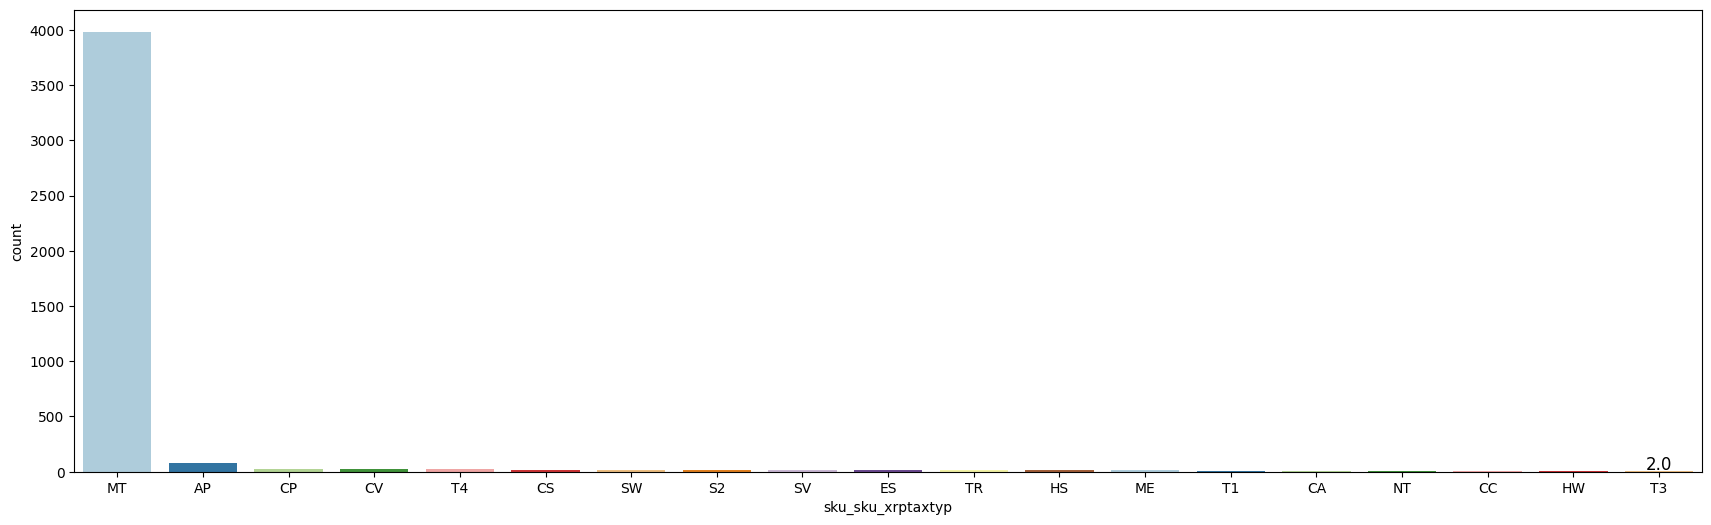

In [ ]:
labeled_barplot(df, "sku_sku_xrptaxtyp",perc=True)


In [ ]:
# Creating a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Prints the count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

EDR32B-AS-00         1
BCSCLP-MT-00         1
TIMERECORD-US-00     1
EngageSW-CS-00       1
EngageSW-AS-00       1
                    ..
LUSRND-MT-00         1
LUSRND-US-00         1
LWEBSV-AS-00         1
LWEBSV-CS-00         1
1EXCTRY-SFW-CS-00    1
Name: sku_cd, Length: 4269, dtype: int64
--------------------------------------------------
TRAINABLE CARE.                                     3
BACS Interface 1-SUB                                2
INFORMIX UPGRADE                                    2
EBD-CONTACT MANAGER Subscription                    2
EBD-WEB Forms Subscription                          2
                                                   ..
LEGAL TIME ENTRY MANAGER CONTRACT                   1
LEGAL TIME ENTRY MANAGER MAINTENANCE                1
WESTLAW LEGAL CALENDARING RULES- CONTRACT NC FED    1
WESTLAW LEGAL CALENDARING RULES- CONTRACT ND ALL    1
Flosuite Executry Software                          1
Name: sku_desc, Length: 4182, dtype: int64
------------------

For 'sku_modid', cyu, mstrings, admin are the top 3 categories. For 'sku_createid', dbo, Iadmin, and Admin are the top 3 categories. 1 Month, 1 Month, and STD are the top 3 categories for 'sku_newsls_dr_tmplt'. Active Object is the most common sku_xtype. In terms of "sku_sku_xrptaxtyp", MT, AP, and CP are the top 3.Sku_factory_f1 - 4268 of it are No. The sku_tax_type contains ES, MT, and SW as the top 3 values with the highest count.

In [ ]:
def histogram_boxplot(df, feature, figsize=(18, 12), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (18,12))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid is 2
        sharex=True,  # all subplots share the same x-axis
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creates the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box, showmeans=True, color="blue"
    )  # creates a boxplot and triangle indicates the mean
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist
    )  # creates a histogram
    ax_hist.axvline(
        df[feature].mean(), color="yellow", linestyle="--"
    )  # Adds mean to the histogram
    ax_hist.axvline(
        df[feature].median(), color="green", linestyle="-"
    )  # Adds median to the histogram

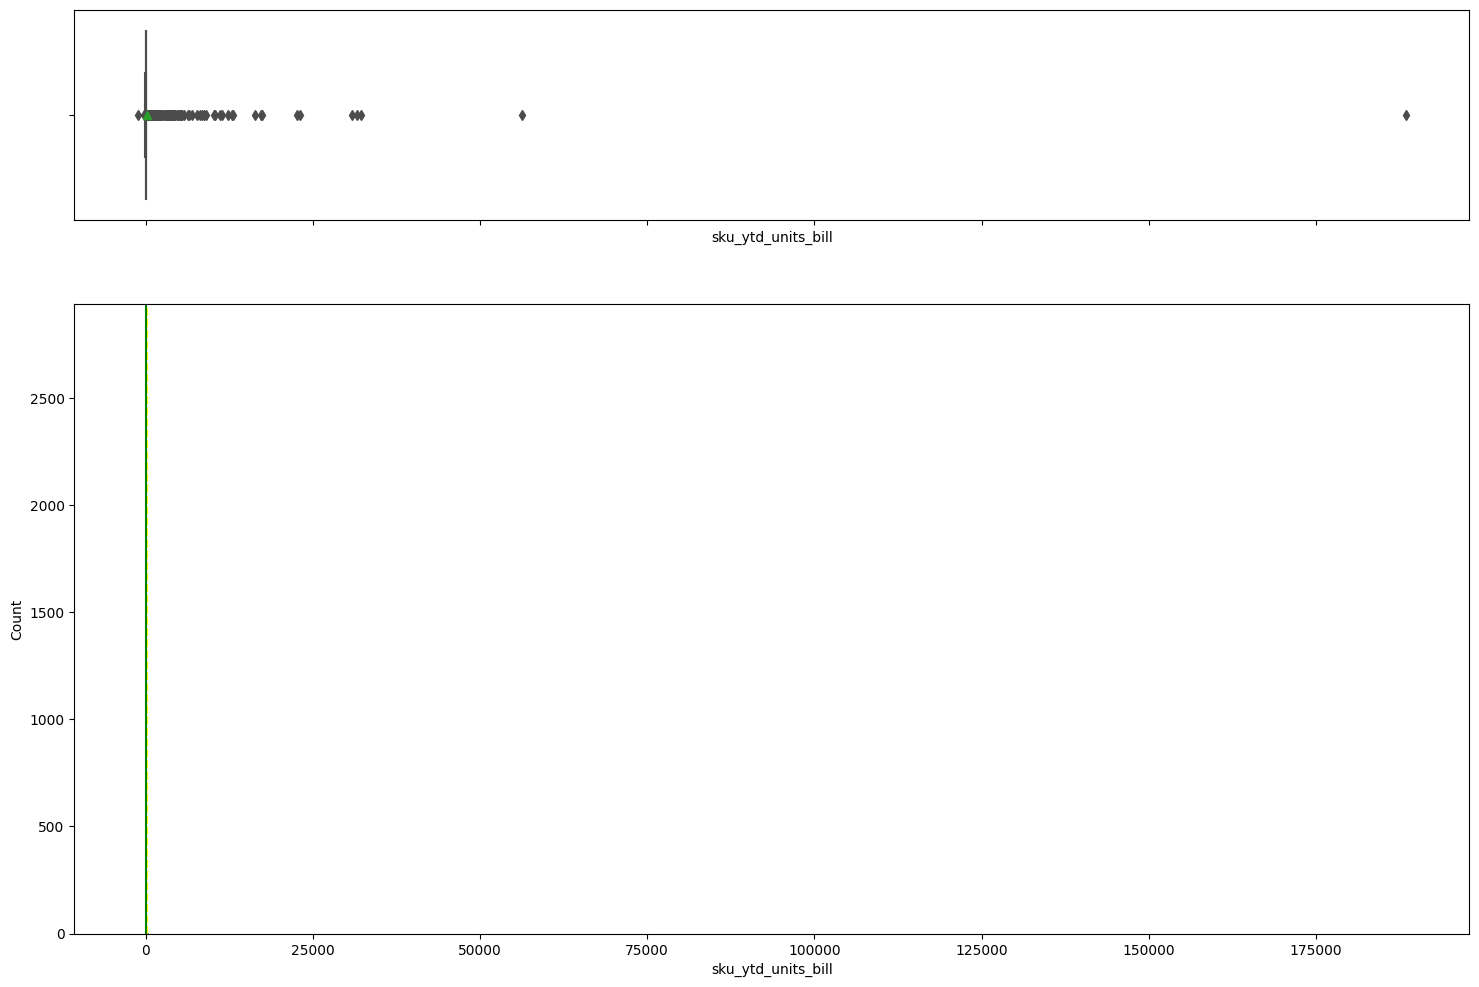

In [ ]:
histogram_boxplot(df,'sku_ytd_units_bill')